In [1]:
!pip install qiskit
!pip install numpy

In [2]:
import numpy as np
from qiskit import *

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [4]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)



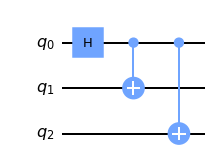

In [5]:
circ.draw('mpl')



In [6]:
from qiskit import Aer


In [7]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [8]:
backend = Aer.get_backend('aer_simulator')

In [9]:
job = backend.run(circ)

In [10]:
result = job.result()

In [11]:
print(result)

Result(backend_name='aer_simulator', backend_version='0.10.3', qobj_id='645e3941-b21e-48f9-a9d1-af5877fe1fc8', job_id='67578c43-f79d-4c97-9f33-4eb27ed8e6ec', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-0', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=1776497750, metadata={'parallel_state_update': 8, 'batched_shots_optimization': False, 'measure_sampling': False, 'device': 'CPU', 'num_qubits': 0, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [], 'num_clbits': 0, 'input_qubit_map': []}, time_taken=6.773e-06)], date=2022-04-19T11:11:41.215180, status=COMPLETED, status=QobjHeader(backend_name='aer_simulator', backend_version='0.10.3'), metadata={'time_taken': 0.000111168, 'time_taken_execute': 2

In [12]:
result.data()

{}

In [13]:
circ = QuantumCircuit(3,3)

In [14]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circ.measure(range(3),range(3))

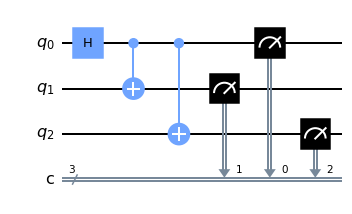

In [15]:
circ.draw('mpl')

In [16]:
job = backend.run(circ)

In [17]:
result = job.result()

In [18]:
result.data()

{'counts': {'0x0': 467, '0x7': 557}}

Now we show the statevector similator possibilities (i.e. plotting the state city)

In [19]:
from qiskit.visualization import plot_state_city

In [20]:
backend = BasicAer.get_backend('statevector_simulator')

In [21]:
result = backend.run(transpile(circ, backend)).result()
psi  = result.get_statevector(circ)

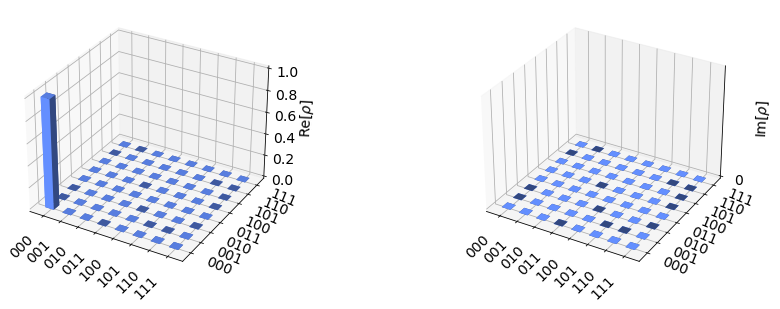

In [22]:
plot_state_city(psi)

Now we add some noise

In [23]:
from qiskit.providers.aer import AerSimulator

In [24]:
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

In [25]:
sim_vigo= AerSimulator.from_backend(device_backend)

In [26]:
tcirc = transpile(circ, sim_vigo)

In [27]:
result_noise = sim_vigo.run(tcirc).result()

In [28]:
result_noise.data()

{'counts': {'0x2': 9,
  '0x5': 20,
  '0x6': 23,
  '0x4': 10,
  '0x1': 22,
  '0x0': 518,
  '0x7': 407,
  '0x3': 15}}